## Tema 4 - Sistemas de aprendizaje automático
### Ejercicio 16 - Segunda versión
### Sergio Villaverde Busto

#### Importamos librerías

In [1]:
import pandas as pd

#### Cargamos datos

In [2]:
players_df = pd.read_csv(r"C:\Users\sergi\OneDrive - Consejería de Educación\IA\Sistemas de aprendizaje automático\Tema 4\Practicas\ejercicios_python\laliga.csv")
players_df.head()

,Jugador,categoria,Partidos,Minutos_jugados,Goles,Asistencias,Paradas,Goles_encajados,Tiros,Tiros_a_ puerta,...,Errores_en_gol_en_contra,Regates_con_exito,Pasesconexito,Precisionpases,Cornerscolgados,Faltascolgadas,Faltascolgadasprecisas,Faltas directas,Faltasdirectasapuerta,Golesdefalta
0,Eden Hazard,3,11,803,1,2,0,0,13,9,...,0,39,15,86,1,0,0,0,0,0
1,Adnan Januzaj,3,17,804,2,3,0,0,19,5,...,0,20,17,68,11,3,0,2,0,0
2,Pione Sisto,3,20,804,2,0,0,0,27,14,...,1,24,9,83,12,6,1,1,0,0
3,Alfonso Pedraza,2,13,808,0,0,0,0,9,300,...,0,13,700,75,0,0,0,0,0,0
4,Jeison Murillo,2,9,810,0,0,0,0,2,100,...,0,1,0,83,0,2,0,0,0,0


#### Comprobamos la existencia de valores nulos
En este caso no existe ningún valor nulo.

In [3]:
print(players_df.isnull().sum())

Jugador                            0
categoria                          0
Partidos                           0
Minutos_jugados                    0
Goles                              0
Asistencias                        0
Paradas                            0
Goles_encajados                    0
Tiros                              0
Tiros_a_ puerta                    0
Precision_tiros                    0
Centros                            0
Centros_ precisos                  0
Precision_centros                  0
Tiros_al palo                      0
Corners_forzados                   0
Faltas_recibidas                   0
Faltas_cometidas                   0
Pases_interceptados                0
Balones_robados                    0
Balones_robado al_ultimo_hombre    0
Tarjetas_amarillas                 0
Tarjetas_rojas                     0
Penaltis_cometidos                 0
Penaltis_forzados                  0
Penaltis_lanzados                  0
Penaltis_anotados                  0
P

#### Guardamos el nombre del jugador en una lista para la gráfica final

In [4]:
names = players_df.Jugador.tolist()

#### Eliminamos la columna Jugador y categoría

In [5]:
#   eliminamos la columna jugador
players_df = players_df.drop(['Jugador', 'categoria'], axis=1)

#### Asignación y estandarización de datos

In [6]:
#   estandarizamos los datos
from sklearn import preprocessing
x = players_df.values   # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)
X_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.105263,0.000000,0.05,0.142857,0.0,0.0,0.120370,0.007500,0.69,0.089385,...,0.000000,0.309524,0.003261,0.865385,0.011494,0.000000,0.000000,0.000000,0.0,0.0
1,0.421053,0.000582,0.10,0.214286,0.0,0.0,0.175926,0.004167,0.26,0.201117,...,0.000000,0.158730,0.003696,0.519231,0.126437,0.050000,0.000000,0.086957,0.0,0.0
2,0.578947,0.000582,0.10,0.000000,0.0,0.0,0.250000,0.011667,0.52,0.206704,...,0.333333,0.190476,0.001957,0.807692,0.137931,0.100000,0.083333,0.043478,0.0,0.0
3,0.210526,0.002912,0.00,0.000000,0.0,0.0,0.083333,0.250000,0.33,0.106145,...,0.000000,0.103175,0.152174,0.653846,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,0.000000,0.004077,0.00,0.000000,0.0,0.0,0.018519,0.083333,0.50,0.005587,...,0.000000,0.007937,0.000000,0.807692,0.000000,0.033333,0.000000,0.000000,0.0,0.0


#### Comparamos los datos sin estandarizar con los estandarizados
<p>Esta gráfica nos muestra cómo los datos se separan más unos de otros gracias al preprocesado de datos utilizando la función <b>MinMaxScaler</b>, esto nos permitirá trabajar con datos más diferenciados entre ellos y obtener mejores resultados a la hora de clasificar dichos datos.</p>

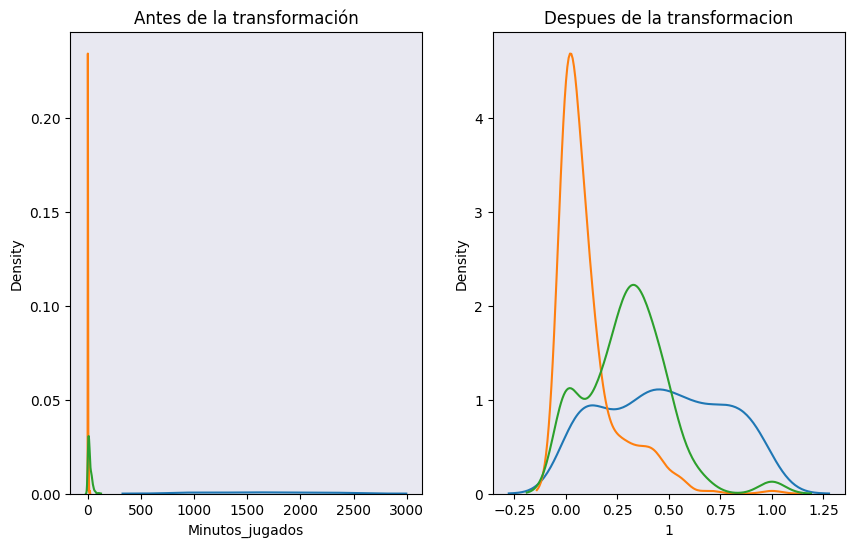

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,6))

ax1.set_facecolor('#E8E8F1')
ax2.set_facecolor('#E8E8F1')

ax1.set_title('Antes de la transformación')
sns.kdeplot(players_df['Minutos_jugados'], ax=ax1)
sns.kdeplot(players_df['Goles'], ax=ax1)
sns.kdeplot(players_df['Tiros'], ax=ax1)
ax2.set_title('Despues de la transformacion')
sns.kdeplot(X_norm[1], ax=ax2)
sns.kdeplot(X_norm[2], ax=ax2)
sns.kdeplot(X_norm[8], ax=ax2)
plt.show()

#### Reducimos dimensionalidad con PCA

In [8]:
#   genera los PCA para generar el modelo
from sklearn.decomposition import PCA
pca = PCA(n_components=2)   # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))
reduced

,0,1
0,-0.552319,0.571589
1,-0.438178,0.413610
2,-0.368409,0.419380
3,-0.622687,0.096929
4,-0.803714,0.038956
...,...,...
294,0.814931,-0.138607
295,-0.432327,-0.080881
296,-0.333397,-0.109402
297,-0.383895,-0.085145


#### Modelo K-Means

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(reduced)
labels = kmeans.predict(reduced)
centroid = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

#### Modificamos el cluster recién creado para añadir columnas nuevas y renombrar las existentes

In [10]:
reduced['cluster'] = clusters
reduced['nombre'] = names
reduced.columns = ['x', 'y', 'cluster', 'nombre']
reduced.head()

,x,y,cluster,nombre
0,-0.552319,0.571589,1,Eden Hazard
1,-0.438178,0.413610,1,Adnan Januzaj
2,-0.368409,0.419380,1,Pione Sisto
3,-0.622687,0.096929,1,Alfonso Pedraza
4,-0.803714,0.038956,1,Jeison Murillo


#### Graficamos los clústeres

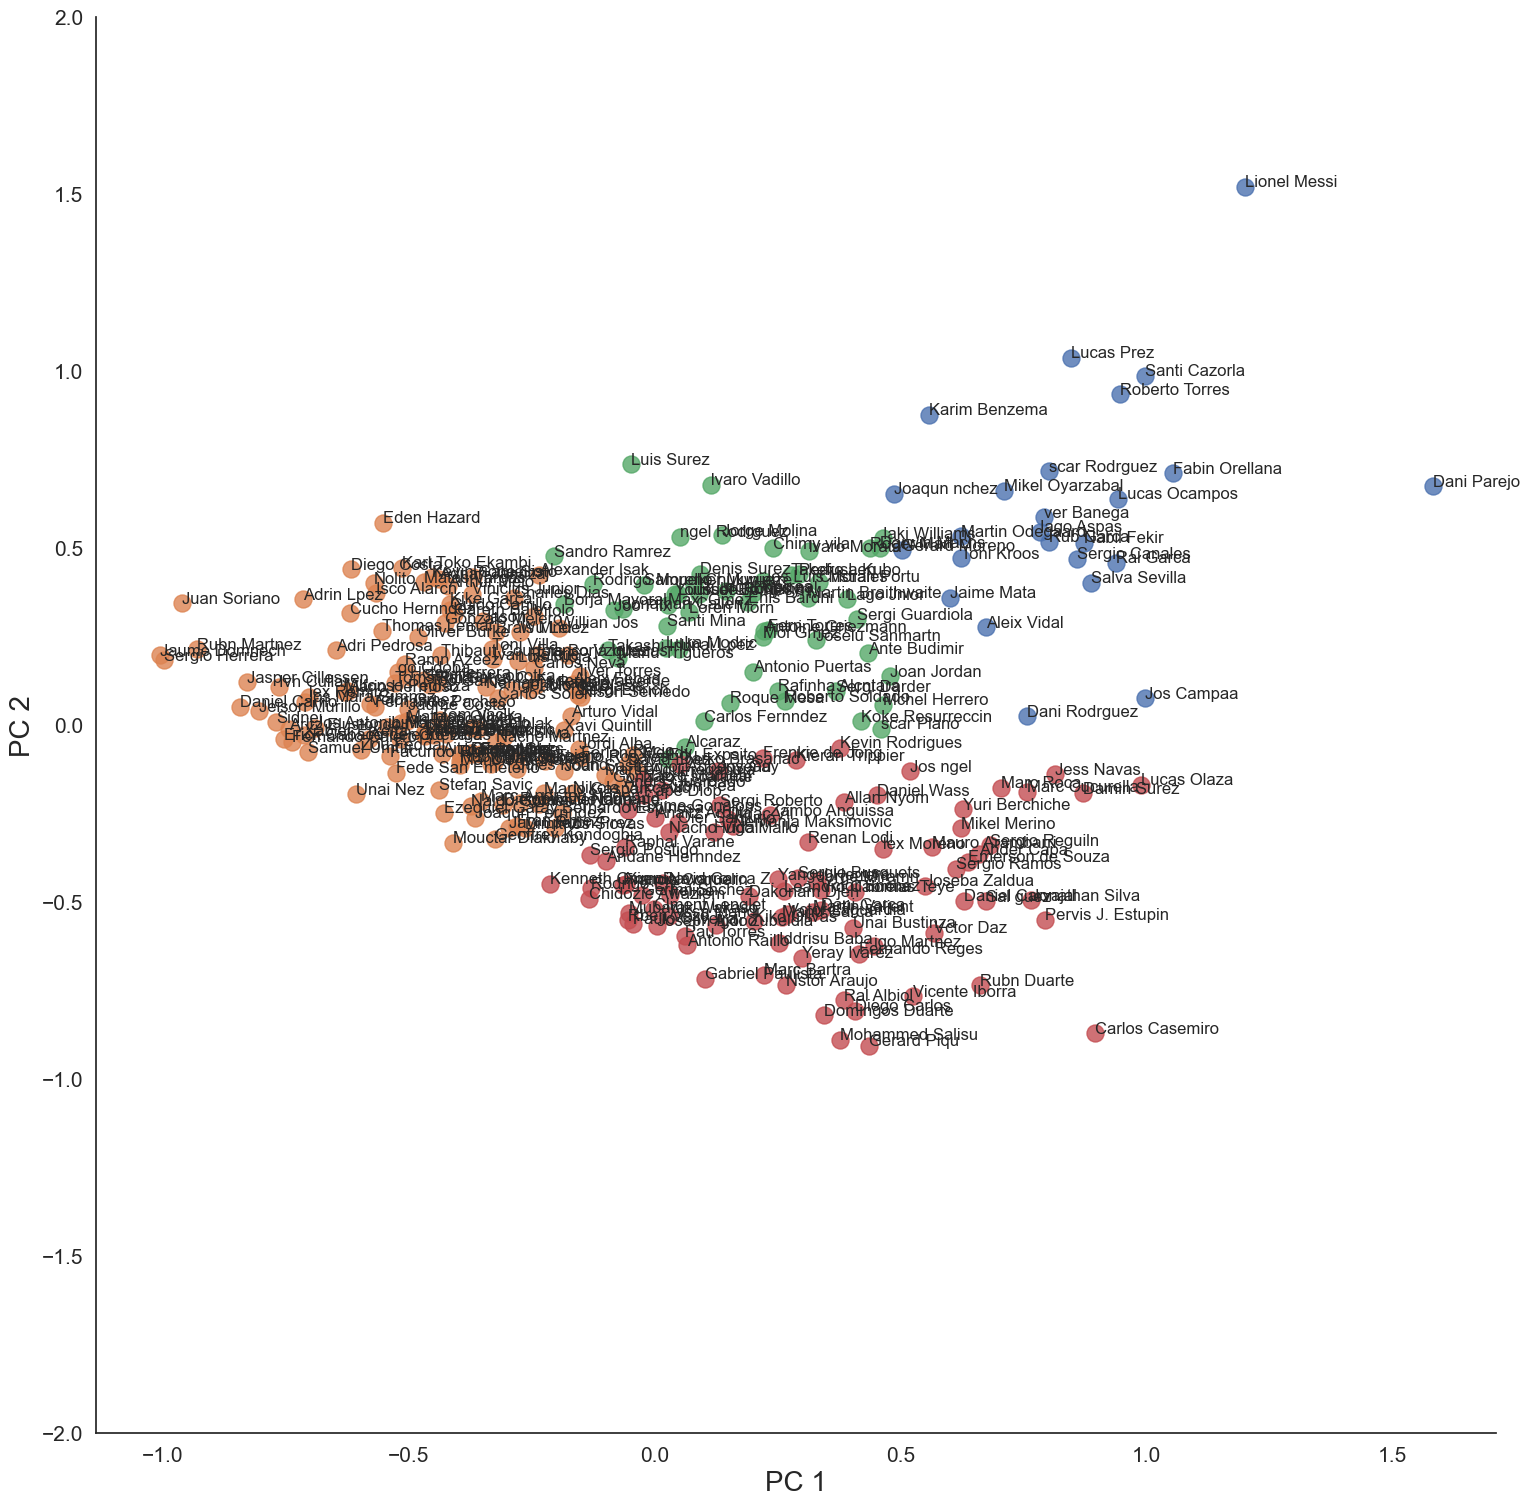

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
ax = sns.lmplot(x='x', y='y', hue='cluster', data=reduced, legend=False, fit_reg=False, height=15, scatter_kws={'s': 150})
texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.nombre):
    texts.append(plt.text(x, y, s))
    ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize=20)
plt.ylabel("PC 2", fontsize=20)
plt.show()

#### Conclusiones finales
<p><div style="text-align: justify">En este ejercicio podemos comprobar con la gráfica final que el modelo no es preciso al 100%.</div></p>
<p><div style="text-align: justify">Esto se debe a que, igual que en el ejercicio anterior, hay jugadores que por las estadísticas que logran a lo largo de la temporada no deberían jugar en la posición en la que juegan.</div></p>
<p><div style="text-align: justify">Gracias a esto podemos descubrir que ciertos jugadores podrían tener un mejor desempeño en posiciones distintas a las habituales, cosa que sucede en el fútbol moderno y que hemos visto en casos de ciertos jugadores que han ido modificando su posición en el esquema de juego de su equipo.</div></p>